In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Read some product review data

In [2]:
products = pd.read_csv("amazon_baby.csv")

# Let's explore this data together

In [4]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# Build the word count vector for each review

In [3]:
LOAD_PROCESSED_DATA = True

if LOAD_PROCESSED_DATA:
    products = pd.read_pickle("processed/data.pkl")
else:
    # processing, takes time!
    import nltk

    # filll np.NaN with empty string
    products.review = products.review.fillna(value='')

    # tokenize all words
    products['word_count'] = products.review.apply(nltk.word_tokenize)

    # count number of each work; get rid of punctuations.
    from collections import Counter
    from string import punctuation

    puncs = set(punctuation)

    def count_words(list_of_words):

        c = Counter([
            word
            for word in list_of_words
            if (set(word) - puncs)
        ])
        return dict(c)

    products['word_count'] = products.word_count.apply(count_words)

In [6]:
products.shape

(183531, 4)

In [ ]:
LOAD_WORD_COUNT = True

In [10]:
if LOAD_WORd_COUNT:
    word_count_df = pd.read_pickle("processed/word_count_df.pkl")
else:
    # find the one with maximum keywords
    max_keywords = max([len(v) for v in products.word_count.values])

    # find one with the maximum keywords
    for v in products.word_count.values:
        if len(v) == max_keywords:
            data = v

    # convert word_count column into a dataframe
    word_count_df = pd.DataFrame(products.word_count.to_list(), columns=data.keys())

    # fill missing values with "0"
    word_count_df = word_count_df.fillna(0)

    # append the rating to the word_count_df
    word_count_df = pd.concat((word_count_df, products.loc[:, ['name', 'review', 'rating']]), axis='columns')

NameError: name 'LOAD_WORd_COUNT' is not defined

In [11]:
MB = 2**20
sum(word_count_df.memory_usage(deep=True)) / MB

1380.5560121536255

In [12]:
word_count_df.head()

,new,to,cloth,diapering-,trying,figure,out,if,its,right,...,shop,extremely,helpful,answer,any,questions,about,name,review,rating
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# Exploring the most popular product

In [14]:
word_count_df.name.value_counts().reset_index()

,index,name
0,Vulli Sophie the Giraffe Teether,785
1,"Simple Wishes Hands-Free Breastpump Bra, Pink,...",562
2,Infant Optics DXR-5 2.4 GHz Digital Video Baby...,561
3,Baby Einstein Take Along Tunes,547
4,"Cloud b Twilight Constellation Night Light, Tu...",520
...,...,...
32412,"Britax B-Ready Stroller, Navy Blue",1
32413,(Set/3) Superman &amp; Wonder Woman Window Dec...,1
32414,Maternity Pillow,1
32415,Phil and Teds Explorer With FREE Doubles Kit i...,1


# Explore Vulli Sophie

In [18]:
giraffe_reviews = word_count_df.loc[products.name == 'Vulli Sophie the Giraffe Teether', ]

In [19]:
len(giraffe_reviews)

785

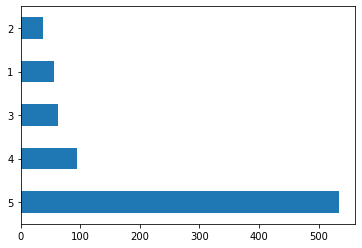

In [20]:
giraffe_reviews.rating.value_counts().plot(kind='barh')
plt.show()

# Build a sentiment classifier

In [22]:
word_count_df.rating.describe()

count    183531.000000
mean          4.120448
std           1.285017
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

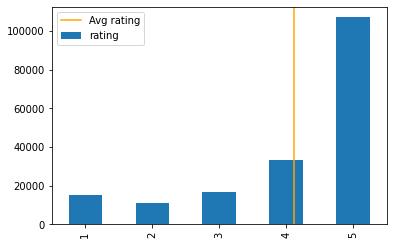

In [24]:
avg_rating = word_count_df.rating.mean() - 1 # because ticks starts from "0"
word_count_df.rating.value_counts().sort_index().plot(kind='bar')
plt.axvline(avg_rating, color='orange', label='Avg rating')
plt.legend()
plt.show()

## Define what's a positive and a negative sentiment

In [27]:
# ignore all 3* reviews
word_count_df= word_count_df[word_count_df.rating != 3]

In [28]:
# add sentiment column
word_count_df['sentiment'] = word_count_df.rating >= 4

# Let's train the sentiment classidier

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [42]:
X = word_count_df.drop(['name', 'review', 'rating', 'sentiment'], axis=1)
y = word_count_df.sentiment

In [14]:
# here, we could use a pipeline that is consisted of a Normalized and a logistic regression

In [46]:
logreg = LogisticRegression(solver='lbfgs')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
logreg.fit(X_train, y_train)

In [49]:
y_pred = logreg.predict(X_test)

In [55]:
print(f"Accuracy Score: {metrics.accuracy_score(y_test, y_pred)*100}%")

Accuracy Score: 87.77547899613205%


**Null accuracy**: accuracy that could be achieved by always predicting the most frequent clas

In [34]:
word_count_df.sentiment.value_counts()[1] / len(products)

0.7642251172826389

# Evaluate the sentiment model

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# Create ROC curve using open source packages

Print these metrics:
* accuracy
* recall
* precision
* f1 score
* how to change the threshold in sklearn

# Applying the learned model to understand sentiment for Giraffe

* append the probability to its dataframe

## Sort the reviews based on the predicted sentiment and explore

* sort by 'predicted_sentiment'; ascending False

In [125]:
# explore the most positive and negative reviews

In [ ]:
giraffe_reviews[0]['review']

In [ ]:
giraffe_reviews[1]['review']

## Show most negative reviews

In [ ]:
giraffe_reviews[-1]['review']

In [ ]:
giraffe_reviews[-2]['review']